In [93]:
#Create a matrix

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import subprocess

DATA_DIR = "./data"
%matplotlib inline
NR_RUNS = 200
BIG_NR = 1000000000
MAX_NR = 20
LOOP_TIMES = 3

ladrilho_cmd = "./ladrilho_valido {size} {size} {seed} > ./data/ladrilho_{size}_{i}.txt"




In [94]:
def init_ladrilhos(size):
    for i in range(NR_RUNS):
        randint = np.random.randint(0, BIG_NR)
        subprocess.check_output(ladrilho_cmd.format(size=size, i=i, seed=randint), shell=True)

def init_all_ladrilhos():
    for size in range(1, MAX_NR+1):
        #for cols in range(1, MAX_NR+1):
        init_ladrilhos(size)

In [95]:
#init_all_ladrilhos()

In [96]:
#Create empty np array with dimensions 20x20




In [109]:
hyperfine_rslt_file = "./rslts/hyperfine_rslt_{size}.json"
cmd = 'hyperfine --runs 3 -P step 1 {LOOP_TIMES} "./main < ./data/ladrilho_{size}_{step}.txt" --export-json {filename}'

def run_cmd(cmd, size, filename):
    step=r"{step}"
    return subprocess.check_output(cmd.format(size=size, step=step, filename=filename, LOOP_TIMES=LOOP_TIMES), shell=True).decode("utf-8")


# Run benchmark
for size in range(MAX_NR+1):
    if size +1 < 18:
        continue
    filename = hyperfine_rslt_file.format(size=size+1)
    run_txt = run_cmd(cmd, size+1, filename)

KeyboardInterrupt: 

./rslts/hyperfine_rslt_17.json
8.609696737411111
./rslts/hyperfine_rslt_17.json
8.609696737411111
./rslts/hyperfine_rslt_17.json
8.609696737411111
./rslts/hyperfine_rslt_17.json
8.609696737411111
./rslts/hyperfine_rslt_17.json
8.609696737411111
./rslts/hyperfine_rslt_17.json
8.609696737411111
./rslts/hyperfine_rslt_17.json
8.609696737411111
./rslts/hyperfine_rslt_17.json
8.609696737411111
./rslts/hyperfine_rslt_17.json
8.609696737411111
./rslts/hyperfine_rslt_17.json
8.609696737411111
./rslts/hyperfine_rslt_17.json
8.609696737411111
./rslts/hyperfine_rslt_17.json
8.609696737411111
./rslts/hyperfine_rslt_17.json
8.609696737411111
./rslts/hyperfine_rslt_17.json
8.609696737411111
./rslts/hyperfine_rslt_17.json
8.609696737411111
./rslts/hyperfine_rslt_17.json
8.609696737411111
./rslts/hyperfine_rslt_17.json
8.609696737411111
./rslts/hyperfine_rslt_17.json
8.609696737411111
./rslts/hyperfine_rslt_17.json
8.609696737411111
./rslts/hyperfine_rslt_17.json
8.609696737411111


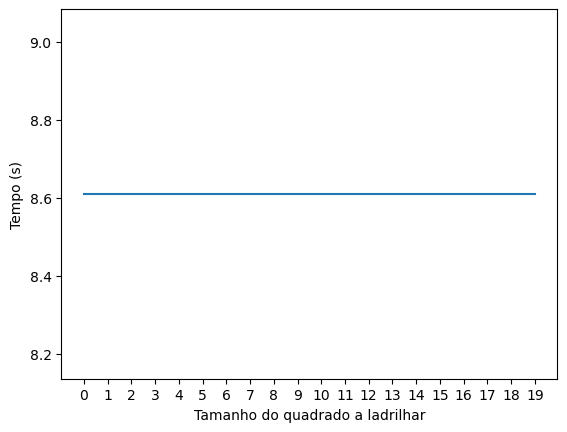

In [107]:
#matrix = np.zeros((MAX_NR, MAX_NR))
hyper_rslts = np.zeros(MAX_NR)
import json

# Loop through array
for i in range(15):
    #for j in range(MAX_NR):
   #     hyperfine_rslt_file.format(size=i+1)
        # Get the time for the i,j ladrilho
    #    filename = hyperfine_rslt_file.format(size=i+1)
        print(filename)
        with open(filename, "r") as f:
            data = json.load(f)
            count = 0
            sum = 0
          #  time = data["results"][0]["mean"]
            for rslt in data["results"]:
                count += 1
                sum += rslt["mean"]
            real_mean = sum / count
            hyper_rslts[i] = real_mean
            print(real_mean)
# Label the axes
#Limit x axis to integers only
plt.xticks(np.arange(0, MAX_NR+1, 1.0))
plt.xlabel("Tamanho do quadrado a ladrilhar")
plt.ylabel("Tempo (s)")

# Plot the results
plt.plot(hyper_rslts)
     